<a href="https://colab.research.google.com/github/DavidSenseman/BIO5853/blob/master/Lesson_02_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO5853: Biostatistics**

## **Lesson_02_3:  Sampling Distributions of the Mean**

##### **Module II: Probability**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)

### Module II Material
* Part 2.1: Probability
* Part 2.2: Theorectical Probability Distributions**
* **Part 2.3: Sampling Distributions of the Mean**

#### In this assignment you will learn about:

* Sampling Distributions
* Central Limit Theorem
* Applications of the Central Limit Theorem

### Google CoLab Instructions

The following code will map your GDrive to ```/content/drive``` and print out your Google GMAIL address.

In [1]:
# YOU MUST RUN THIS CELL FIRST
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


### **Introduction**

In the previous chapter we examine theoretical probability distributions,such as the binomial distribution and the normal distribution. In all cases the relevant population parameters are assumed to be known; this allows us to describe the distributions completely and calculate the probabilities associated with various outcomes. In most practical applications, however, we are not given the values of these parameters. Instead, we must attempt to describe or estimate a population parameter – such as the mean of a normally distributed random variable – using the information contained in a sample of observations selected from the population. The process of drawing conclusions about an entire population based on the information contained in a sample is known as **_statistical inference_**. 

(Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 191). CRC Press. Kindle Edition.) 

### Example 1: Download Dataset

The code in the cell below downloads the serum cholesterol dataset from the course file server and creates a Pandas DataFrame called `scDF`. In this dataset, the serum cholesterol values are diving into two categories, `young` and `old`. For the examples below, we won't care about the age of the subject, only the total number of subjects that had a particular serum cholesterol value. The code therefore creates a new DataFrame column called `total_subjects` by adding together the values in the `young` and `old` columns using the following code chunk:

~~~text
# Create a total column
scDF['total_subjects'] = scDF['young'] + scDF['old']
~~~
It then uses the `display()` function to print out 8 rows and 8 columns to make sure the new DataFrame, `scDF`, is correct. 

In [2]:
# Example 1: Download dataset

import pandas as pd

# Read the datafile 
scDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/serum_chol.csv",
    index_col=0,
    na_values=['NA','?'])

# Create a total column
scDF['total_subjects'] = scDF['young'] + scDF['old']

# Set max rows and max columns
pd.set_option('display.max_rows', 8)
pd.set_option('display.max_columns', 8) 

# Display DataFrame
display(scDF)

,level,midpoint,young,old,...,old_rel_freq,old_cum_freq,bounds,total_subjects
1,80-119,99.5,13,5,...,0.400000,0.400000,79.5,18
2,120-159,139.5,150,48,...,3.900000,4.300000,119.5,198
3,160-199,179.5,442,265,...,21.600000,25.900000,159.5,707
4,200-239,219.5,299,458,...,37.299999,63.200001,199.5,757
...,...,...,...,...,...,...,...,...,...
6,280-319,299.5,34,128,...,10.400000,96.500000,279.5,162
7,320-359,339.5,9,35,...,2.900000,99.400002,319.5,44
8,360-399,379.5,5,7,...,0.600000,100.000000,359.5,12
9,400-439,419.5,1,0,...,0.000000,100.000000,399.5,1


If the code is correct you should see the following output:

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_3_image10.png)


### **Exercise 1: Download Dataset**

In the cell below, download the file `age_at_death.csv` from the course file server using the Pandas function `pd.read_csv()`. As the file is read, store the data in a new DataFrame called `ageDF`. Set the max rows and columns to 8 and then display the contents of your new DataFrame, `ageDF`.

NOTE: With this dataset, there is no need to add any DataFrame columns together as was done in Example 1.

In [3]:
# Insert your code for Exercise 1 here

import pandas as pd

# Read the datafile 
ageDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/age_at_death.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 8)
pd.set_option('display.max_columns', 8) 

# Display DataFrame
display(ageDF)

,age,deaths,prob
1,0,0,0.00000
2,1,589,0.00589
3,2,40,0.00040
4,3,25,0.00025
...,...,...,...
102,101,800,0.00800
103,102,700,0.00700
104,105,435,0.00435
105,110,0,0.00000


If your code is correct you should see the following output:

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_3_image01.png)


### **Create Function**

The code in the cell below creates a function called `add_repeated_number()`. Thia function will used in Example 2 and **Exercise 2**. If you don' run this cell, you will get an error when you try to run Example 2. 

In [4]:
# Create function

def add_repeated_number(array, number, times):
    repeated_number = np.repeat(number, times)
    return np.concatenate((array, repeated_number))

## **Experimental Distribution**

An **_Experimental Distribution_** refers to the distribution of data points collected from an experiment. It represents the frequencies or probabilities of different outcomes observed during the experiment. This type of distribution is crucial for several reasons:

#### **Definition**
An experimental distribution is essentially a _histogram_ or probability distribution derived from experimental data. It shows how often each outcome occurs, providing a visual and statistical representation of the data collected.

#### **Importance**
1. **Understanding Data Patterns:** It helps in identifying patterns, trends, and anomalies in the experimental data. This can be crucial for making informed decisions based on the observed outcomes.
2. **Hypothesis Testing:** Experimental distributions are used to test hypotheses. By comparing the experimental distribution to a theoretical distribution, researchers can determine if their hypotheses hold true.
3. **Estimating Parameters:** It allows for the estimation of parameters such as mean, variance, and standard deviation, which are essential for summarizing and understanding the data.
4. **Model Validation:** Experimental distributions are used to validate statistical models. By comparing the model’s predictions to the experimental distribution, researchers can assess the model’s accuracy and reliability.
5. **Decision Making:** In fields like engineering, medicine, and social sciences, experimental distributions provide the empirical evidence needed to make critical decisions.
6. **Identifying Relationships:** They help in identifying relationships between variables, which can be crucial for understanding cause-and-effect dynamics in experimental research12.

### Example 2: Create Experimental Distribution


Ideally, if we wanted to know the mean serum cholesterol levels for males in the US, we would measure the **_entire male population_**. That would be impractical. As of July 1, 2022, there were approximately 165.28 million males living in the United States. But what we can do, is measure serum cholesterol in a **_sample_** of US males. The obvious approach would be to use the mean of the sample as an estimate of the unknown population mean $µ$. The sample mean $\bar{X}$ is called an **_estimator_** of the parameter $µ$. There are many different approaches to the process of estimation. If we assumed the population to be normally distributed, the sample mean $\bar{X}$ is something called a **_maximum likelihood estimator_**. The method of maximum likelihood finds the value of the parameter that is most likely to have produced the observed sample  data. This method can usually be relied on to yield reasonable estimators. Note, however, that two different samples are likely to result in **_different sample means_**; consequently, there is some degree  of uncertainty involved.

The code in the cell belows creates an **_Experimental Distribution_** fron the data stored in `scDF`. This experimental distribution is called `chol_expDist_ar` and it is a Numpy array, not a Pandas DataFrame. You can think of this numpy array as containing the serum cholesterol measurement for each male in the sample. 

For example, for the lowest serum cholesterol level measured (80-119, midpoint=99.5) there were 13 'young' men and 5 'old' men for a total of 13 'males'. Using a simple `for loop`, the code adds 13 values of 99.5 to `chol_expDist_ar`. During the next turn of the loop, the next lowest values of serum cholesterol (120-159, midpoint=139.5) are added. Since 150 'young' men and 48 'old' had a serum cholesterol value between 120-159--for a total of 198 males--$198$ copies of the midpoint number $139.5$ are againh added to the experimental distribution. By the end the for loop, `chol_expDist_ar` contains 2295 serum cholesterol (midpoint) values--one for each male in the sample.  

_Code Description:_

In Python, an array must be _initialized_ (created) before it can be used. This code chunk intializes the 4 numpy arrays used in this code cell:

~~~text
# Create numpy arrays
total_ar = np.array(scDF.total_subjects)
chol_ar = np.array(scDF.midpoint)
dummy_array=([])
chol_expDist_ar = ([ ])
~~~

The first two arrays are created from the DataFrame `scDF` using the `np.array(df)` function. The `np.array(df)` function is used when you want to convert the numeric (or string) values in a DataFrame into a Numpy array format. 

The first array, `total_ar`, contains the total number of subjects that had a specific cholesterol value, while the second array, `chol_ar`, contains the corresponding serum cholesterol ("midpoint") values. 

The last two arrays, `dummy_array` and `chol_expDist_ar` are initialized, but contain no data -- they will be filled with data later. 

The main component of the code is the `for loop`. The `for loop` makes 9 iterations (i.e. 'loops')--one loop for each of the 9 serum cholesterol levels. During each pass through the loop, our special function `add_repeated_number()` is called. As an argument, the function is given a specific midpoint cholesterol value and the number of males that had that value. 

For example, during the first loop pass, the counter variable `i` is equal to 0. The special function is passed the value in  of `males_ar[0]` which is $13$, and the corresponding cholesterol value in `chol_ar[0]` which is $99.5$. These two values are passed the special function. `add_repeated_number()`. The special function generates 13 copies of $99.5$ and "returns" these 13 copies in the variable `result`. The last line of the `for loop` uses the `np.concatenate()` function to add these 13 copies of $99.5$ to the numpy array `scDF_expDist_ar`. 

~~~text
for i in range(len(chol_ar)):
    result = add_repeated_number(dummy_array, chol_ar[i], total_ar[i])
    chol_expDist_ar  = np.concatenate((chol_expDist_ar, result), axis=None)
~~~

After the `for loop` has completed 9 turns--one turn for example cholesterol (midpoint) level--it will have added 2295 cholesterol values to the `scDF_expDist_ar`--one serum cholesterol value for each male subject. In other words, the code is essentially recreating the "raw data" obtained in the study and storing these data points in the numpy array, `scDF_expDist_ar`.  

Now that we have recreated our "experimental distribution", we can use the Numpy function `np.mean(array)` to find the distribution's mean, as it shown last section of the code cell below. 

In [5]:
# Example 2: Create experimental distribution

import numpy as np
import matplotlib.pyplot as plt

# Define variables
total_US_males=168280000

# Create numpy arrays
total_ar = np.array(scDF.total_subjects)
chol_ar = np.array(scDF.midpoint)
dummy_array = ([])
chol_expDist_ar = ([])

# Loop through array 
for i in range(len(chol_ar)):
    result = add_repeated_number(dummy_array, chol_ar[i], total_ar[i])
    chol_expDist_ar = np.concatenate((chol_expDist_ar, result), axis=None)
    
# Compute mean
chol_expDist_ar_mean = np.mean(chol_expDist_ar)

# Compute sample number
sample_number = chol_expDist_ar.size

# Compute fraction
chol_fraction = sample_number/total_US_males

# Print result -- use \ to continue the print statement to the next line
print(f"Mean serum cholesterol = {chol_expDist_ar_mean:.2f} \
mg/dl determined from an experimental distribution of {sample_number} males.")
print(f"This sample represents {chol_fraction:.6f} of the total male population in the US")

Mean serum cholesterol = 215.11 mg/dl determined from an experimental distribution of 2295 males.
This sample represents 0.000014 of the total male population in the US


If the code is correct, you should see the following output:

~~~text
Mean serum cholesterol = 215.11 mg/dl determined from an experimental distribution of 2295 males.
This sample represents 0.000014 of the total male population in the US
~~~

If the goal of our serum cholesterol study was to say something about the serum cholesterol values of _all_ the males across the US, we might want to be somewhat cautious. After all, even though we measured the cholesterol values in 2295 male subjects, this is only a tiny fraction (0.000014) of the total population of males in the US. 

A really fundamental question in biostatistics is how can we extrapolate the results that were obtained in a sample population to a much large population. In fact there is a large branch of statistics devoted to this very question. This branch is called **_Inferential Statistics_** which we will study later in this course. 

As will be demonstrated in this lesson and in **Chapter 8** of your textbook, we can be relatively certain that a **_statistic_**, such as the _mean_, $\bar{X}$, computed for a sample, must be reasonable close the **_true population mean_**, $µ$, even though we will _never_ be able to actually measure it!  

### **Exercise 2: Create Experimental Distribution**

In the cell below, create an experimental distribution called `age_expDist_ar` using the data in the DataFrame `ageDF`. Create a numpy array called `age_ar` from the data in column `ageDF.age` and another array called `deaths_ar` from the column `ageDF.deaths`. You will also need to initialize two additional arrays called `dummy_ar` and `age_expDist_ar`. The last array, `age_expDist_ar` is the experimental distribution for the age at death dataset and contains the subject's age at his/her time of death. 

Your code should also calculate the average (mean) age at the time of death. Call this value `age_expDist_ar_mean`. Also calculate the total number of subjects in your experimental distribution. Use an `f print` statement to print out these values. (See the expected output for the correct wording). 

In [6]:
# Insert your code for Exercise 2 here

import numpy as np
import matplotlib.pyplot as plt

# Create numpy arrays
age_ar = np.array(ageDF.age)
deaths_ar = np.array(ageDF.deaths)
dummy_array=([])
age_expDist_ar = ([])

# Loop through arrays
i = 0
for i in range(len(age_ar)):
    result = add_repeated_number(dummy_array, age_ar[i], deaths_ar[i])
    age_expDist_ar  = np.concatenate((age_expDist_ar, result), axis=None)
    
# Compute mean
age_expDist_ar_mean = np.mean(age_expDist_ar)

# Compute sample number
sample_number = age_expDist_ar.size

# Print result -- use \ to continue the print statement to the next line
print(f"Mean age at death = {age_expDist_ar_mean:.2f} \
years determined from an experimental distribution of {sample_number} subjects.")

Mean age at death = 79.22 years determined from an experimental distribution of 99999 subjects.


If your code is correct, you should see the following output:

~~~text
Mean age at death = 79.22 years determined from an experimental distribution of 99999 subjects.
~~~

### Example 3: Plot Histogram of Experimental Distribution

Plotting an **_Experimental Distribution_** is crucial in statistical research for several reasons:

1. **Visualization of Data:** It provides a clear visual representation of the data, making it easier to understand the underlying patterns, trends, and anomalies. This can be particularly helpful in identifying outliers or unusual observations.
2. **Understanding Probability:** By visualizing the distribution, researchers can better understand the probability of different outcomes. This is essential for making predictions and decisions based on the data.
3. **Comparison of Distributions:** Plotting allows for easy comparison between different datasets or experimental conditions. For example, comparing the distribution of test scores between two different teaching methods can reveal which method is more effective.
4. **Hypothesis Testing:** Visualizing the distribution helps in assessing the assumptions of statistical tests. For instance, many parametric tests assume that the data follows a normal distribution. Plotting the data can help verify this assumption.
5. **Communication of Results:** Graphical representations are often more intuitive and easier to interpret than raw data or numerical summaries. They can effectively communicate findings to a broader audience, including those who may not have a strong statistical background.
6. **Identifying Patterns:** It helps in identifying patterns such as skewness, kurtosis, and modality (e.g., unimodal, bimodal). These patterns can provide insights into the nature of the data and guide further analysis.

The code in the cell below uses the `Matplotlib.pyplot` function `ax.hist()` to create a histogram of the experimental distribution `chol_expDist_ar` created in the Example 2. Details concerning the code for generating a histogram were provided in a previous lesson.


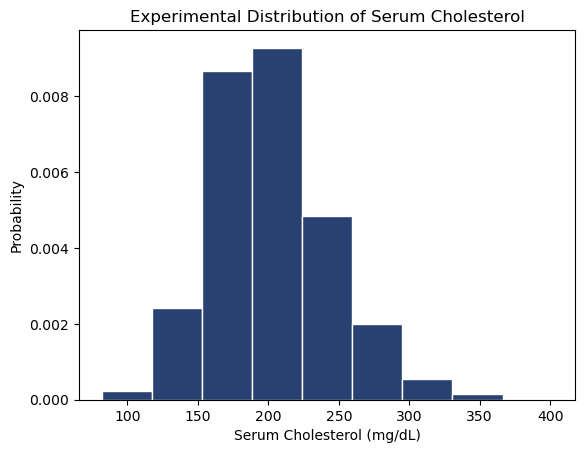

In [7]:
# Example 3: Create histogram of experimental distribution

import numpy as np
import matplotlib.pyplot as plt

# Create variables
num_bins = 9
chart_color = '#294171'
    
# Create plotting environment
fig, ax = plt.subplots()

# Set the default font size
plt.rcParams.update({'font.size': 10})  # You can adjust the size as needed

# Plot histogram
ax.hist(chol_expDist_ar, bins=num_bins, 
         color=chart_color, 
         edgecolor='white', 
         align='left',
         density=True)

ax.set_xlabel('Serum Cholesterol (mg/dL)')
ax.set_ylabel('Probability')
ax.set_title("Experimental Distribution of Serum Cholesterol")

# Show plot
plt.show()

If the code is correct you should see the following output:

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_3_image11.png)


### **Exercise 3: Plot Histogram of Experimental Distribution**

In the cell below, write the Python code to create a histogram of your experimental distribution `age_expDist_ar` that was created in **Exercise 2**. Set the number of bins to `25`, the x axis label to read 'Age (years)', the y-axis label to read 'Probability' and title your graph "Experimental Distribution Age at Death". 

_Code Modification:_

You can use the code in Example 3, but you will need to make the following modifications:

1. Set `num_bins=25`
2. Set `ax.set_xlabel('Age (years)')`
3. Set `ax.set_ylabel('Probability')`
4. Set `ax.set_title("Experimental Distribution Age at Death")`

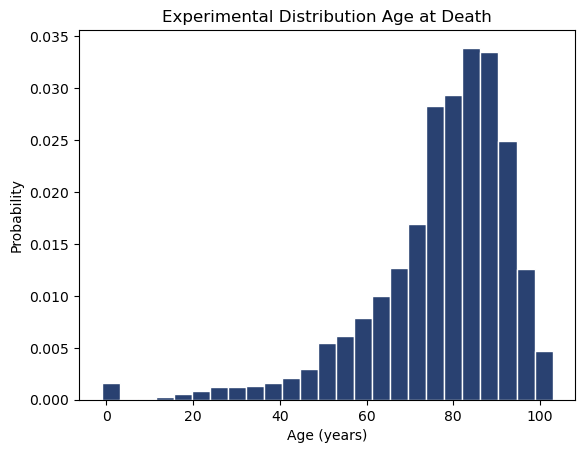

In [8]:
# Insert your code for Exercise 3 here

import numpy as np
import matplotlib.pyplot as plt

# Create variables
num_bins = 25
chart_color = '#294171'

# Create plotting environment
fig, ax = plt.subplots()

# Set the default font size
plt.rcParams.update({'font.size': 10})  # You can adjust the size as needed

# Plot histogram
ax.hist(age_expDist_ar, bins=num_bins,           
         color=chart_color, 
         edgecolor='white', 
         align='left',
         density=True)

ax.set_xlabel('Age (years)')
ax.set_ylabel('Probability')
ax.set_title("Experimental Distribution Age at Death")

# Show plot
plt.show()

If the code is correct you should see the following output:

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_3_image02.png)


## **Sampling Distributions of the Mean**

A **_Sampling Distribution of the Mean_** is the probability distribution of all possible sample means of a given size from a population. It is a fundamental concept in inferential statistics.

#### **Key Characteristics**

1. **Central Limit Theorem (CLT):** Regardless of the population’s distribution, the sampling distribution of the mean will tend to be normally distributed if the sample size is sufficiently large (usually ( $n \geq 30$).
2. **Mean of the Sampling Distribution:** The mean of the sampling distribution ($\mu_{\bar{x}}$) is equal to the mean of the population ($\mu$).
3. **Standard Error:** The standard deviation of the sampling distribution ($\sigma_{\bar{x}}$), known as the standard error, is given by:

$$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$$​

where $\sigma$ is the population standard deviation and $n$ is the sample size.

#### **Importance**

1. **Estimation:** Sampling distributions allow us to estimate population parameters (like the mean) from sample statistics.
2. **Hypothesis Testing:** They provide the basis for conducting hypothesis tests. By comparing the sample mean to the sampling distribution, we can determine the likelihood of observing such a sample mean if the null hypothesis is true.
3. **Confidence Intervals:** They are used to construct confidence intervals for population parameters, giving us a range of plausible values for the parameter.

### Example 4: Sample from a Population Distribution

For the purposes of illustration, suppose we could measure the serum cholesterol value for **_all_** the males in a population? In that case, we can easily find the **_true population mean_**, $µ$, by adding up all the serum cholesterol values and dividing by the population size, $N$. In this instance, there is only a single value for the mean, $µ$.

$ \mu = \frac{1}{N} \sum_{i=1}^{N} X_i $

While it would be impractical to obtain serum cholesterol measurements for the entire US male population, what if we were only interested in cholesterol values of males living in a small town like Alpine, TX, which is located near the foothills of Davis Mountains? Alpine has a population of only ~2300 males, so it is conceivable that we could obtain a cholesterol measurement for every male resident of Alpine. So, let's imagine that we did this and our measurements--all 2295 serum cholesterol values--are in stored in the Numpy array `scDF_expDist_ar`. 

This Numpy array is no longer an Experimental Distribution, but instead, it is now a **Population Distribution** since it contains the cholesterol value for _every_ member in the entire population being investigated! In Example 3 we measured the mean of this experimental distribution to be `215.11 mg/dl`. If `scDF_expDist_ar` is now a population distribution, the value `215.11 mg/dl` would be the population mean, $µ$. There is no uncertainity associated with this value. There is no standard deviation or variance. The value `215.11 mg/dl` is not an estimate, but the **_true_** mean for our population of male residents of Alpine, Texas. 

_Code Description:_

The following code chunk uses the numpy method `np.copy()` to create a new **_Population Distribution_** array called `chol_popDist_ar`.

~~~text
# Make Population Distribution
chol_popDist_ar = np.copy(chol_expDist_ar)
~~~

The next code chunk uses a Python technique called `list comprehension` to draw 4 sets of sample values from the population distribution. Each sample contains 25 values. 

~~~text
# Use enumeration to generate sample data sets
data_sets = [np.random.choice(chol_popDist_ar, size=sample_size, replace=True) for _ in range(num_dat_sets)]
~~~

Here is an explanation of what this code chunk does:

1. np.random.choice:
- This function is used to generate a random sample from a given 1-D array.
- Parameters:
- - chol_popDist_ar: The array from which samples are drawn.
- - size=sample_size: The number of samples to draw.
- - replace=True: Allows sampling with replacement, meaning the same element can be chosen more than once.

2. List Comprehension:
- The code uses a list comprehension to create a list of random samples.
-- for _ in range(num_dat_sets): This part of the code runs the sampling process num_dat_sets times. The underscore _ is used as a variable name when the variable’s value is not needed.

**What the Code Does:**

* **chol_popDist_ar:** This is your population distribution array from which you want to draw samples.
* **sample_size:** This is the number of samples you want to draw in each iteration.
* **num_dat_sets:** This is the number of different datasets you want to generate.

The code generates `num_dat_sets` datasets, each containing `sample_size` samples drawn from `chol_popDist_ar` with replacement. The result is a list of arrays, where each array is one set of samples.

The number of sample to be drawn is determined by the variable `sample_size`. In this example, the `sample_size` was set to `25`. The number of data sets to be generated was determined by the variable `num_dat_sets` which was set to `4`.

Finally, the code uses a simple `for loop` to print out the sample mean and standard deviation of the sample values in each of the four data sets.

In [9]:
# Example 4A: Select a random sample

import numpy as np
import matplotlib.pyplot as plt

# Make Population Distribution
chol_popDist_ar = np.copy(chol_expDist_ar)

# Compute true mean of Population
chol_Population_mean = np.mean(chol_popDist_ar)

# Define variables
sample_size = 25
num_dat_sets = 4

# Set the seed
np.random.seed(42)

# Use list comprehension to generate sample data sets
data_sets = [np.random.choice(chol_popDist_ar, size=sample_size, replace=True) for _ in range(num_dat_sets)]

# Initialize lists
dat_mean=[]
dat_std=[] 

# Print the header
print("_______________________________________________________________")
print(f"    Sample of Size {sample_size}     x̄              s   ")
print("_______________________________________________________________")

# Loop through the data and print mean and std
for i, data in enumerate(data_sets):
     dat_mean = np.mean(data, axis=0)
     dat_std = np.std(data, axis=0)
     print(f"           {i+1}            {dat_mean:.2f}          {dat_std:.2f}")

print(f"The true population mean for this distribution = {chol_Population_mean:.2f}.") 


_______________________________________________________________
    Sample of Size 25     x̄              s   
_______________________________________________________________
           1            211.50          39.19
           2            225.90          47.57
           3            206.70          46.26
           4            229.10          48.37
The true population mean for this distribution = 215.11.


If the code is correct, you should see the following output:

~~~text
_______________________________________________________________
    Sample of Size 25     x̄              s   
_______________________________________________________________
           1            211.50          39.19
           2            225.90          47.57
           3            206.70          46.26
           4            229.10          48.37
The true population mean for this distribution = 215.11.
~~~

### Example 4B: Compute Average of Sample Means

As you can see from the output above, the 4 sample means, $\bar{x_i}$, computed from a sample of 25 values are: $211.50$, $225.90$, $206.70$ and $229.10$. Since this is _population_ distribution, we were able to compute the true mean, $\bar{X}$ which is $215.11$. By inspection, we can see that the mean value computed from 25 samples drawn randomly from the population distribution (with replacment), are "roughly" the same value as the true mean--some are higher, and some are lower. 

Let's see what happens when we compute the average (mean) of the 4 sample means?

In [10]:
# Compute average of the sample means

# Define array
avg_ar = np.array([211.50, 225.90, 206.70, 229.10])

# Compute mean
sample_mean_avg = np.mean(avg_ar)

# Print result
print(f"The average of the 4 sample means = {sample_mean_avg:.2f}.") 
print(f"The true population mean for this distribution = {chol_Population_mean:.2f}.") 


The average of the 4 sample means = 218.30.
The true population mean for this distribution = 215.11.


If the code is correct you should see the following:

~~~text
The average of the 4 sample means = 218.30.
The true population mean for this distribution = 215.11.
~~~

The average of the four sample means, $218.30$, is closer to, but definitely not the same as, the true population mean $215.11$.

### **Exercise 4A: Sample from a Population Distribution**

In the cell below, write the Python code to create a population distribution called `age_popDist_ar` from a copy of your `age_expDist_ar` using the `np.copy()` function. Compute the true mean value of your population distribution and call this value, Then generate 4 data sets, each containing 25 samples, from your population distribution. Using a `for loop`, print out the mean and standard deviation of each dataset. 

_Code Modifications:_

You can use the code in Example 4A with the following exceptions:

1. Change the make population to read:
~~~type
# Make Population Distribution
age_popDist_ar = np.copy(age_expDist_ar)
~~~

2. You will need to use `age_popDist_ar` instead of `chol_popDist_ar` when applicable.

In [11]:
# Insert your code for Exercise 4A here

import numpy as np
import matplotlib.pyplot as plt

# Make Population Distribution
age_popDist_ar = np.copy(age_expDist_ar)

# Compute true mean of Population
age_Population_mean = np.mean(age_popDist_ar)

# Define variables
sample_size = 25
num_dat_sets = 4

# Set the seed
np.random.seed(42)

# Use list comprehension to generate sample data sets
data_sets = [np.random.choice(age_popDist_ar, size=sample_size, replace=True) for _ in range(num_dat_sets)]

# Initialize lists
dat_mean=[]
dat_std=[] 

# Print the header
print("_______________________________________________________________")
print(f"    Sample of Size {sample_size}     x̄              s   ")
print("_______________________________________________________________")

# Loop through the data and print mean and std
for i, data in enumerate(data_sets):
     dat_mean = np.mean(data, axis=0)
     dat_std = np.std(data, axis=0)
     print(f"           {i+1}            {dat_mean:.2f}          {dat_std:.2f}")

print(f"The true population mean for this distribution = {age_Population_mean:.2f}.") 


_______________________________________________________________
    Sample of Size 25     x̄              s   
_______________________________________________________________
           1            76.32          21.54
           2            79.36          16.45
           3            84.28          10.20
           4            78.92          17.18
The true population mean for this distribution = 79.22.


If the code is correct, you should see the following output:

~~~text
_______________________________________________________________
    Sample of Size 25     x̄              s   
_______________________________________________________________
           1            76.32          21.54
           2            79.36          16.45
           3            84.28          10.20
           4            78.92          17.18
The true population mean for this distribution = 79.22.
~~~

### **Exercise 4B: Compute Average of Sample Means**

In the cell below, compute the true population mean for your population distribution, `age_popDist_ar`. Then compute the average of the four sample means generated in **Exercise 4A**. Print out this sample mean average as well as the true population mean.

In [12]:
# Insert your code for Exercise 4B here

# Define array
avg_ar = np.array([76.32, 79.36, 84.28, 78.92])

# Compute mean
sample_mean_avg = np.mean(avg_ar)

# Print result
print(f"The average of the 4 sample means = {sample_mean_avg:.2f}.") 
print(f"The true population mean for this distribution = {age_Population_mean:.2f}.") 


The average of the 4 sample means = 79.72.
The true population mean for this distribution = 79.22.


If your code is correct you should see the following:

~~~text
The average of the 4 sample means = 79.72.
The true population mean for this distribution = 79.22.
~~~

The average of the four sample means, $79.72$, is close to, but not the same as, the true population mean $79.22$.

## **Central Limit Theorem**

The **_Central Limit Theorem (CLT)_** is a fundamental principle in statistics that states that the distribution of the sample mean (or sum) of a large number of independent, identically distributed random variables, (i.i.d.) approaches a normal distribution, regardless of the original distribution of the population, provided the sample size is sufficiently large.
Mathematically, if $X_1$, $X_2$, $\ldots$, $X_n$) are independent and identically distributed random variables with mean ($\mu$) and variance ($\sigma^2$), then the sample mean ($\bar{X}$) is approximately normally distributed:

$$ Xˉ∼N(μ,nσ2​) $$

#### **Importance in Biostatistics**

1. **Inference and Hypothesis Testing:** The CLT allows biostatisticians to make inferences about population parameters using sample data. It underpins many statistical tests, such as t-tests and ANOVA, which assume that the sampling distribution of the test statistic is approximately normal.
2. **Confidence Intervals:** The CLT is crucial for constructing confidence intervals for population parameters. It ensures that the interval estimates are valid even when the population distribution is not normal, as long as the sample size is large enough.
3. **Simplification:** In biostatistics, data often come from various distributions. The CLT simplifies analysis by allowing the use of normal distribution approximations, making it easier to apply standard statistical methods.
4. **Large Sample Properties:** Many biostatistical methods rely on large sample properties. The CLT justifies the use of these methods by ensuring that the sample mean will be normally distributed, facilitating more accurate and reliable conclusions.

The central limit theorem is very powerful. It holds true almost measurements in biology, ecology and medicine. It even applies to discrete random variables. The central limit theorem allows us to quantify the uncertainty inherent in statistical inference without having to make a great many assumptions that cannot be verified. Regardless of the probability  distribution of $X$, because the distribution of the sample means is approximately normal with mean $µ$ and standard deviation $σ/√n$, we know that
 

$$ Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} $$

is normally distributed with mean $0$ and standard deviation $1$, as long as $n$ is large enough.

## **Applications of the Central Limit Theorem**

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_3_image13.png)

Consider the distribution of serum cholesterol levels for all 20- to 74-year-old males living in the United States. The mean of this population is $µ$ = 211 mg/100 ml, and the standard deviation is $σ$ = 46 mg/100 ml. If we select repeated samples of size 25 from the population, what proportion of the samples will have a mean value of 230 mg/100 ml or above?  Assuming that a sample of size 25 is large enough, the central limit theorem states that the distribution of means of samples of size 25 is approximately normal with mean $µ$ = 211 mg/100 ml and standard error $σ/√ n = 46/ √ 25$ = 9.2 mg/100 ml. This sampling distribution, and the underlying population from which the samples were drawn, are illustrated in **Figure 8.1** above. 

Note that:  
  

$                                               Z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}} $ 


$                                               =  \frac{\bar{X} − 211}{9.2} $  

is a standard normal random variable. If $\bar{x}$ = 230, then  

$                                               z =  \frac{230 − 211}{9.2} = 2.07. $  

This tells us that a cholesterol level of 230 lies 2.07 standard errors above the population mean.  Referring to Table A.3, the area to the right of $z$ = 2.07 is 0.019. Only about 1.9% of the samples  will have a mean greater than 230 mg/100 ml. Equivalently, if we select a single sample of size 25  from the population of 20- to 74-year-old males, the probability that the mean serum cholesterol  level for this sample is 230 mg/100 ml or higher is 0.019.  What mean value of serum cholesterol level cuts offthe lower

(Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 193). CRC Press. Kindle Edition.) 

### Example 5: Distribution of Age at Time of Death

The code in the cell below uses Python to recreate **Figure 8.2** in your textbook on page 198.

_Code Description:_

The code in the cell below is uses the `Matplotlib.pyplot` function `plt.plot()` to generate a line plot using the following code chunk:

~~~text
# Plot line graph
plt.plot(x,y,c='k')
~~~

The argument `c='k'` assigns the color (`c`) of the line to black (`k`).

To ensure that the y-axis is not visible, the following line of code has been added:

~~~text
# Ensure y-axis is not visible
plt.gca().yaxis.set_visible(False)
~~~

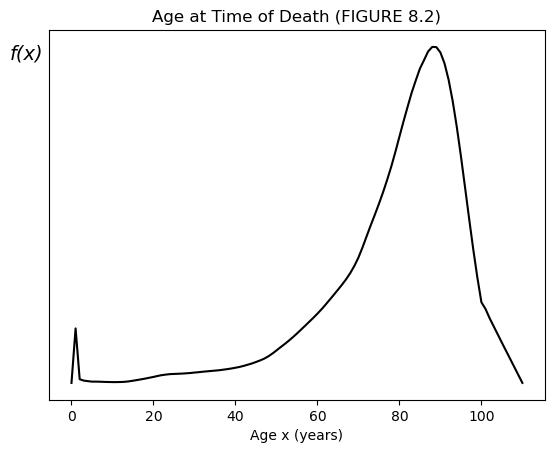

In [13]:
# Example 5: Create line graph (Figure 2.10)

import matplotlib.pyplot as plt

# Assign x and y
x=ageDF.age
y=ageDF.deaths

# Create plotting environment
fig, ax = plt.subplots()

# Plot line graph
plt.plot(x,y,c='k')

# Ensure y-axis is not visible
plt.gca().yaxis.set_visible(False)

# Plot text
plt.text(-15.0, 3500.30, 'f(x)', fontsize=14, style='italic')   # mu at bottom

# Set properties
ax.set_xlabel('Age x (years)')
ax.set_title("Age at Time of Death (FIGURE 8.2)")

# Show plot
plt.show()

If the code is correct you should see the following output:

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_3_image03.png)


The figure legend stated in your textbook is:

> **FIGURE 8.2** Distribution of age at the time of death, United States, 2015 



### Example 6: Means and Standard Deviations of 4 Samples

The code in the cell below creates four data sets each containing 25 random samples drawn from the population distribution `chol_popDist_ar` for the serum cholesterol data. The code is essentially a copy of the code in Example 4A above.

In [14]:
# Example 6: Means and Standard Deviations of Four Samples

import numpy as np
import matplotlib.pyplot as plt


# Compute true mean of Population
chol_Population_mean = np.mean(chol_popDist_ar)

# Define variables
sample_size = 25
num_dat_sets = 4

# Set the seed
np.random.seed(42)

# Use list comprehension to generate sample data sets
data_sets = [np.random.choice(chol_popDist_ar, size=sample_size, replace=True) for _ in range(num_dat_sets)]

# Initialize lists
dat_mean=[]
dat_std=[] 

# Print the header
print("_______________________________________________________________")
print(f"    Sample of Size {sample_size}     x̄              s   ")
print("_______________________________________________________________")

# Loop through the data and print mean and std
for i, data in enumerate(data_sets):
     dat_mean = np.mean(data, axis=0)
     dat_std = np.std(data, axis=0)
     print(f"           {i+1}            {dat_mean:.2f}          {dat_std:.2f}")

print(f"The true population mean for this distribution = {chol_Population_mean:.2f}.") 


_______________________________________________________________
    Sample of Size 25     x̄              s   
_______________________________________________________________
           1            211.50          39.19
           2            225.90          47.57
           3            206.70          46.26
           4            229.10          48.37
The true population mean for this distribution = 215.11.


If the code is correct, you should see the following output:

~~~text
_______________________________________________________________
    Sample of Size 25     x̄              s   
_______________________________________________________________
           1            211.50          39.19
           2            225.90          47.57
           3            206.70          46.26
           4            229.10          48.37
The true population mean for this distribution = 215.11.
~~~

### **Exercise 6: Means and Standard Deviations of 4 Samples**

In the cell below, write the Python code to create four data sets each containing 25 random samples drawn from the population distribution `age_popDist_ar` for the age at time of death dataset. The code should be essentially a copy of your code from **Exercise 4A** above. 

In [15]:
# Insert your code for Exercise 6 here

import numpy as np
import matplotlib.pyplot as plt

# Compute true mean of Population
age_Population_mean = np.mean(age_popDist_ar)

# Define variables
sample_size = 25
num_dat_sets = 4

# Set the seed
np.random.seed(42)

# Use list comprehension to generate sample data sets
data_sets = [np.random.choice(age_popDist_ar, size=sample_size, replace=True) for _ in range(num_dat_sets)]

# Initialize lists
dat_mean=[]
dat_std=[] 

# Print the header
print("_______________________________________________________________")
print(f"    Sample of Size {sample_size}     x̄              s   ")
print("_______________________________________________________________")

# Loop through the data and print mean and std
for i, data in enumerate(data_sets):
     dat_mean = np.mean(data, axis=0)
     dat_std = np.std(data, axis=0)
     print(f"           {i+1}            {dat_mean:.2f}          {dat_std:.2f}")

print(f"The true population mean for this distribution = {age_Population_mean:.2f}.") 


_______________________________________________________________
    Sample of Size 25     x̄              s   
_______________________________________________________________
           1            76.32          21.54
           2            79.36          16.45
           3            84.28          10.20
           4            78.92          17.18
The true population mean for this distribution = 79.22.


If your code is correct, you should see the following output:

~~~text
_______________________________________________________________
    Sample of Size 25     x̄              s   
_______________________________________________________________
           1            76.32          21.54
           2            79.36          16.45
           3            84.28          10.20
           4            78.92          17.18
The true population mean for this distribution = 79.22.
~~~

You should notice that the output above is essentially the same at the table shown on page 199 in your textbook.

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_3_image14.png)

The specific values for the sample means and standard deviations are different because a random selection process was used to draw the 25 values from the population distribution.

### Example 7: Histograms of 4 Samples

The code in the cell below plots histograms for four samples of size 25 from the serum cholesterol population distribution. 

_Code Description:_

1. Since we are plots four histograms in a 2 X 2 arrangement, it is necessary to reduce the font size to 8 instead of the usual 10 using this code chunk:
~~~text
# Set the default font size to 8
plt.rcParams.update({'font.size': 8})  # You can adjust the size as needed
~~~
2. The random seed is set to 33. The form of these histograms will be significantly with different random seed values!

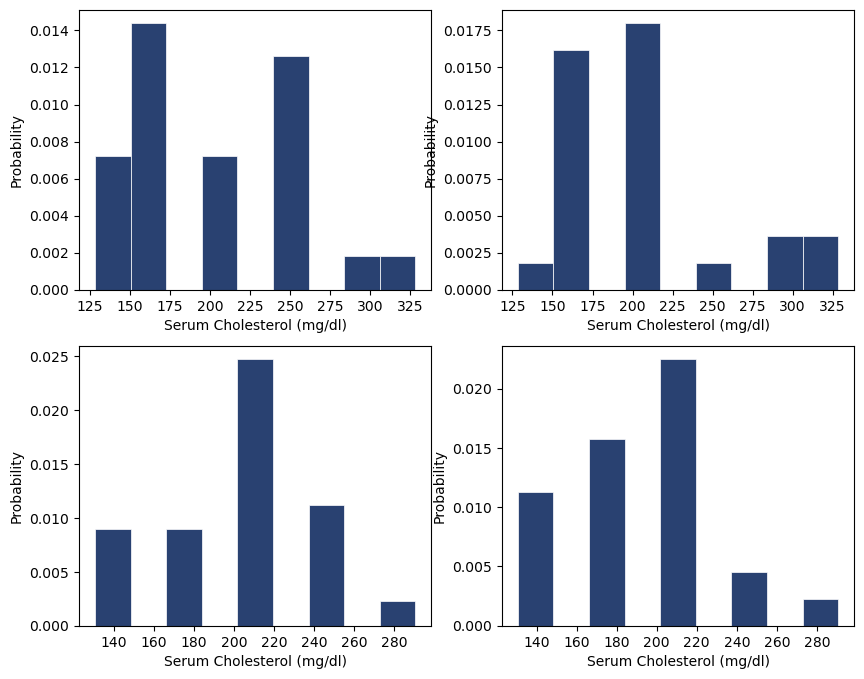

In [16]:
# Example 7: Histograms for 4 samples

import numpy as np
import matplotlib.pyplot as plt

# Define variables
sample_size = 25
num_dat_sets = 4
num_bins=9
chart_color = '#294171'

# Set the seed
np.random.seed(33)

# Create data sets
data_sets = [np.random.choice(chol_popDist_ar, size=sample_size, replace=True) for _ in range(num_dat_sets)]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Set the default font size to 8
plt.rcParams.update({'font.size': 8})  # You can adjust the size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the data sets and corresponding axes
for i, data in enumerate(data_sets):
    axes[i].hist(data, bins=num_bins, 
                 color=chart_color,
                 edgecolor='white',
                 linewidth=0.5,
                 align='left',
                 density='True')
    axes[i].set_xlabel('Serum Cholesterol (mg/dl)')
    axes[i].set_ylabel('Probability')

# Show plot
plt.show()

If the code is correct you should see the following output:

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_3_image16.png)


### **Exercise 7: Histograms of 4 Samples**

The code in the cell below plots histograms for four samples of size 25 from the age at time of death population distribution (`age_popDist_ar`). 

_Code Modifications:_

You can use the code in Example 7 with the following exceptions:

1. You will need to use `age_popDist_ar` instead of `chol_popDist_ar` when applicable.
2. Set `num_bins=25`
3. Make sure the random seed = 33
4. Set `axes[i].set_xlabel('Age (years)')`
5. Set `axes[i].set_ylabel('Probability')`


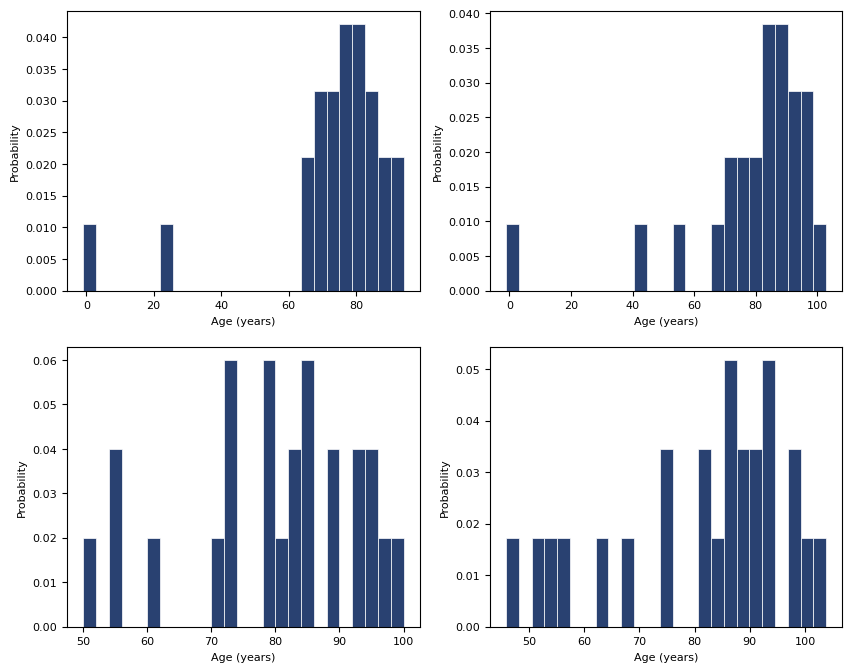

In [17]:
# Insert your code for Exercise 7 here

import numpy as np
import matplotlib.pyplot as plt

# Define variables
sample_size = 25
num_dat_sets = 4
num_bins=25
chart_color = '#294171'

# Set the seed
np.random.seed(33)

# Create data sets
data_sets = [np.random.choice(age_popDist_ar, size=sample_size, replace=True) for _ in range(num_dat_sets)]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Set the default font size
plt.rcParams.update({'font.size': 8})  # You can adjust the size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the data sets and corresponding axes
for i, data in enumerate(data_sets):
    axes[i].hist(data, bins=num_bins, 
                 color=chart_color,
                 edgecolor='white',
                 linewidth=0.5,
                 align='left',
                 density='True')
    axes[i].set_xlabel('Age (years)')
    axes[i].set_ylabel('Probability')

# Show plot
plt.show()

If your code is correct you should see the following output:

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_3_image04.png)


Your figure show be similar to the four histograms shown in **FIGURE 8.3** in your textbook on page 199.

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_3_image15.png)

It won't be the same due to the random selection of samples from the population distribution.

### Example 8: Means and Standard Deviations of 100 Samples

The code in the cell below again creates four data sets but this time each data set contains 100 random samples drawn from the population distribution `chol_popDist_ar` for the serum cholesterol data. The code is essentially a copy of the code in Example 6 above with the value of `sample_size` set to 100.

In [18]:
# Example 8: Means and Standard Deviations of Four Samples

import numpy as np
import matplotlib.pyplot as plt


# Compute true mean of Population
chol_Population_mean = np.mean(chol_popDist_ar)

# Define variables
sample_size = 100
num_dat_sets = 4

# Set the seed
np.random.seed(42)

# Use list comprehension to generate sample data sets
data_sets = [np.random.choice(chol_popDist_ar, size=sample_size, replace=True) for _ in range(num_dat_sets)]

# Initialize lists
dat_mean=[]
dat_std=[] 

# Print the header
print("_______________________________________________________________")
print(f"    Sample of Size {sample_size}     x̄              s   ")
print("_______________________________________________________________")

# Loop through the data and print mean and std
for i, data in enumerate(data_sets):
     dat_mean = np.mean(data, axis=0)
     dat_std = np.std(data, axis=0)
     print(f"           {i+1}            {dat_mean:.2f}          {dat_std:.2f}")

print(f"The true population mean for this distribution = {chol_Population_mean:.2f}.") 


_______________________________________________________________
    Sample of Size 100     x̄              s   
_______________________________________________________________
           1            218.30          46.46
           2            219.90          47.83
           3            216.70          46.39
           4            213.10          45.86
The true population mean for this distribution = 215.11.


If the code is correct, you should see the following output:

~~~text
_______________________________________________________________
    Sample of Size 100     x̄              s   
_______________________________________________________________
           1            218.30          46.46
           2            219.90          47.83
           3            216.70          46.39
           4            213.10          45.86
The true population mean for this distribution = 215.11.
~~~

### **Exercise 8: Means and Standard Deviations of 100 Samples**

In the cell below, write the Python code to create four data sets each containing 100 random samples drawn from the population distribution `age_popDist_ar` for the age at time of death dataset. The code should be essentially a copy of your code from **Exercise 6** above with the variable `sample_size` set to 100. 

Make sure to set the random seed value to 42.

In [19]:
# Insert your code for Exercise 8 here

import numpy as np
import matplotlib.pyplot as plt

# Compute true mean of Population
age_Population_mean = np.mean(age_popDist_ar)

# Define variables
sample_size = 100
num_dat_sets = 4

# Set the seed
np.random.seed(42)

# Use list comprehension to generate sample data sets
data_sets = [np.random.choice(age_popDist_ar, size=sample_size, replace=True) for _ in range(num_dat_sets)]

# Initialize lists
dat_mean=[]
dat_std=[] 

# Print the header
print("_______________________________________________________________")
print(f"    Sample of Size {sample_size}     x̄              s   ")
print("_______________________________________________________________")

# Loop through the data and print mean and std
for i, data in enumerate(data_sets):
     dat_mean = np.mean(data, axis=0)
     dat_std = np.std(data, axis=0)
     print(f"           {i+1}            {dat_mean:.2f}          {dat_std:.2f}")

print(f"The true population mean for this distribution = {age_Population_mean:.2f}.") 


_______________________________________________________________
    Sample of Size 100     x̄              s   
_______________________________________________________________
           1            79.72          17.08
           2            78.87          17.40
           3            78.65          16.76
           4            77.56          17.46
The true population mean for this distribution = 79.22.


If your code is correct, you should see the following output:

~~~text
_______________________________________________________________
    Sample of Size 100     x̄              s   
_______________________________________________________________
           1            79.72          17.08
           2            78.87          17.40
           3            78.65          16.76
           4            77.56          17.46
The true population mean for this distribution = 79.22.
~~~

You should notice that the output above is essentially the same at the table shown on page 199 in your textbook.

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_3_image14.png)

The specific values for the sample means and standard deviations are different because a random selection process was used to draw the 25 values from the population distribution.

### Example 9: Histograms of 100 Samples

The code in the cell below plots histograms for four samples of size 100 from the serum cholesterol population distribution. 


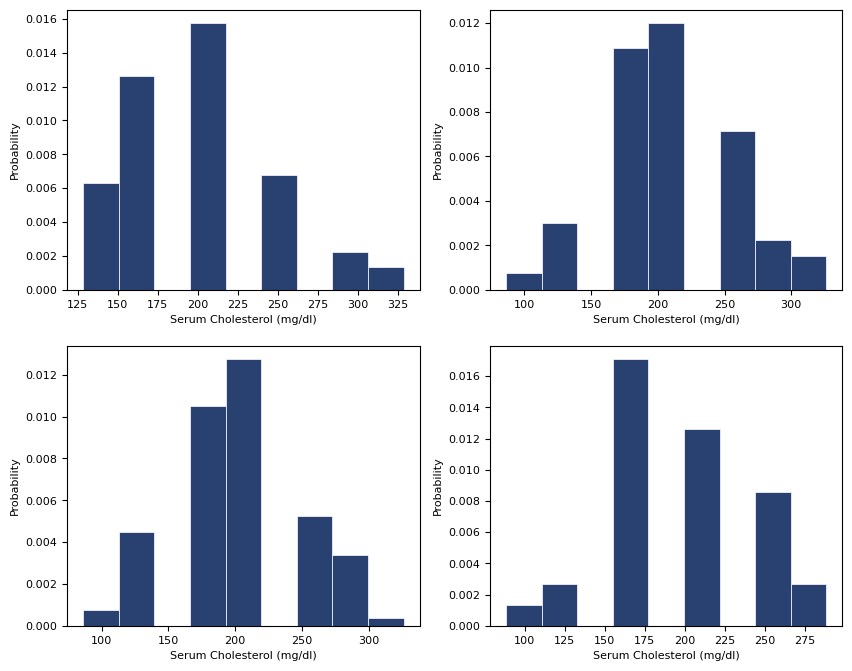

In [20]:
# Example 7: Histograms for 4 samples

import numpy as np
import matplotlib.pyplot as plt

# Define variables
sample_size = 100
num_dat_sets = 4
num_bins=9
chart_color = '#294171'

# Set the seed
np.random.seed(33)

# Create data sets
data_sets = [np.random.choice(chol_popDist_ar, size=sample_size, replace=True) for _ in range(num_dat_sets)]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Set the default font size
plt.rcParams.update({'font.size': 8})  # You can adjust the size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the data sets and corresponding axes
for i, data in enumerate(data_sets):
    axes[i].hist(data, bins=num_bins, 
                 color=chart_color,
                 edgecolor='white',
                 linewidth=0.5,
                 align='left',
                 density='True')
    axes[i].set_xlabel('Serum Cholesterol (mg/dl)')
    axes[i].set_ylabel('Probability')
    
# Show plot
plt.show()

If the code is correct you should see the following output:

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_3_image16.png)


### **Exercise 9: Histograms of 100 Samples**

The code in the cell below plots histograms for four samples of size 100 from the age at time of death population distribution (`age_popDist_ar`). 

_Code Modifications:_

You can use the code in Example 9 with the following exceptions:

1. You will need to use `age_popDist_ar` instead of `chol_popDist_ar` when applicable.
2. Set `num_bins=25`
3. Make sure the random seed = 33
4. Set `axes[i].set_xlabel('Age (years)')`
5. Set `axes[i].set_ylabel('Probability')`


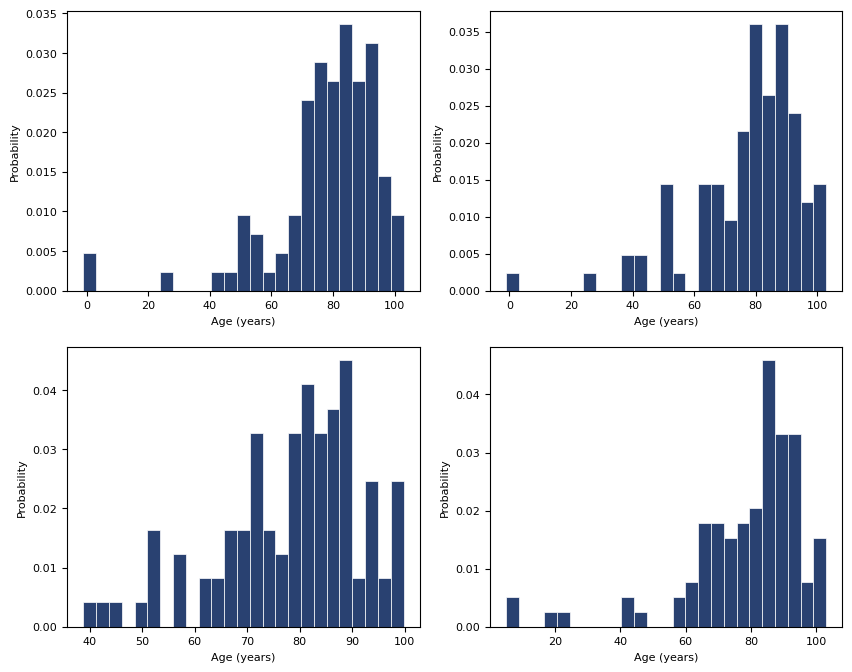

In [21]:
# Insert your code for Exercise 7 here

import numpy as np
import matplotlib.pyplot as plt

# Define variables
sample_size = 100
num_dat_sets = 4
num_bins=25
chart_color = '#294171'

# Set the seed
np.random.seed(33)

# Create data sets
data_sets = [np.random.choice(age_popDist_ar, size=sample_size, replace=True) for _ in range(num_dat_sets)]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Set the default font size
plt.rcParams.update({'font.size': 8})  # You can adjust the size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the data sets and corresponding axes
for i, data in enumerate(data_sets):
    axes[i].hist(data, bins=num_bins, 
                 color=chart_color,
                 edgecolor='white',
                 linewidth=0.5,
                 align='left',
                 density='True')
    axes[i].set_xlabel('Age (years)')
    axes[i].set_ylabel('Probability')

ax.set_xlabel('Age (years)')
ax.set_ylabel('Probability')
ax.set_title("Experimental Distribution Age at Death")

# Show plot
plt.show()

If your code is correct you should see the following output:

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_3_image17.png)


Your figure show be similar to the four histograms shown in **FIGURE 8.4** in your textbook on page 200.

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_3_image18.png)

It won't be the same due to the random selection of samples from the population distribution.

### **Exercise 10: Histograms of 500 Samples**

The code in the cell below plots histograms for four samples of size 500 from the age at time of death population distribution (`age_popDist_ar`). 

**NOTE:** Make sure the value for the random seed has been set to 33. Changing the random seed value can have a very impact on the form of the histograms!

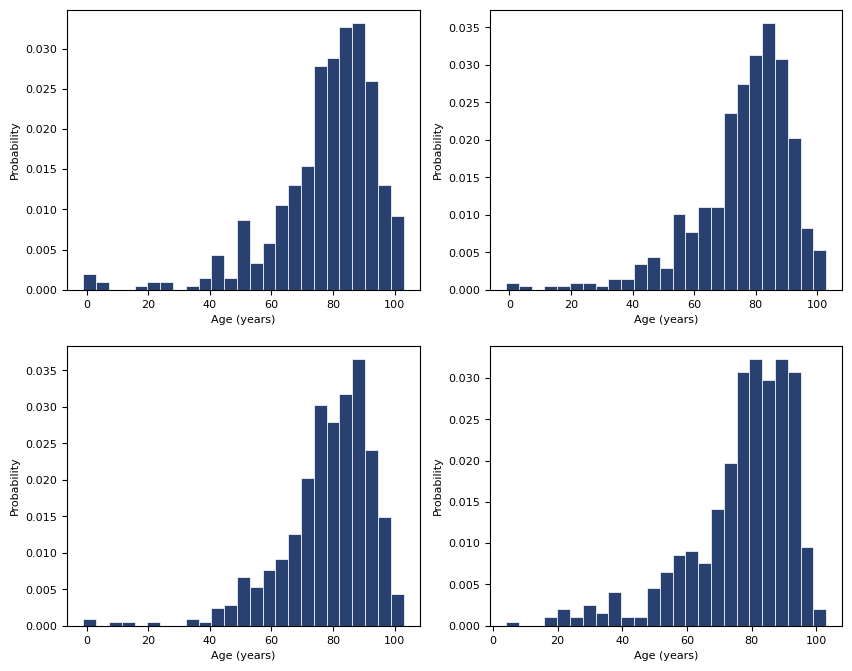

In [22]:
# Insert your code for Exercise 10 here

import numpy as np
import matplotlib.pyplot as plt

# Define variables
sample_size = 500
num_dat_sets = 4
num_bins=25
chart_color = '#294171'

# Set the seed
np.random.seed(33)

# Create data sets
data_sets = [np.random.choice(age_popDist_ar, size=sample_size, replace=True) for _ in range(num_dat_sets)]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Set the default font size
plt.rcParams.update({'font.size': 8})  # You can adjust the size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the data sets and corresponding axes
for i, data in enumerate(data_sets):
    axes[i].hist(data, bins=num_bins, 
                 color=chart_color,
                 edgecolor='white',
                 linewidth=0.5,
                 align='left',
                 density='True')
    axes[i].set_xlabel('Age (years)')
    axes[i].set_ylabel('Probability')

ax.set_xlabel('Age (years)')
ax.set_ylabel('Probability')
ax.set_title("Experimental Distribution Age at Death")

# Show plot
plt.show()

If your code is correct you should see the following output:

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_3_image19.png)


Your figure show be similar to the four histograms shown in **FIGURE 8.5** in your textbook on page 201.

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_3_image20.png)

It won't be the same due to the random selection of samples from the population distribution.

Looking at **Figures 8.3** through **8.5**, we see that as the size of the samples increases, their distributions approach the shape of the population distribution pictured in **Figure 8.2**. Although there are still differences among the samples, the amount of variability in the estimates $\bar{x}$ and $s$  decreases. This property is known as **_consistency_**. As the samples that we select become larger and larger, the estimates of the population parameters approach their target values.  

(Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 201). CRC Press. Kindle Edition.) 

## **Histogram of Sample Means**

The population of ages at the time of death can also be used to demonstrate an application of the central limit theorem. To do this, we must select repeated samples of size $n$ from the population with mean $µ = 79.2$ years and standard deviation $σ = 16.4$ years and examine the distribution of the means of these samples. Theoretically, we must enumerate all possible random samples; for now, however, we select 100 samples of size 25. A histogram of the 100 sample means is displayed in **Figure 8.6** shown below. 

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_3_image21.png)

The figure legend in your textbook on page 202 reads as follows:

> **FIGURE 8.6**  Histogram of 100 sample means from samples of size 25 


### Example 11: Histogram of 100 Sample Means

The Python code in the cell below recreates **Figure 8.6**. 

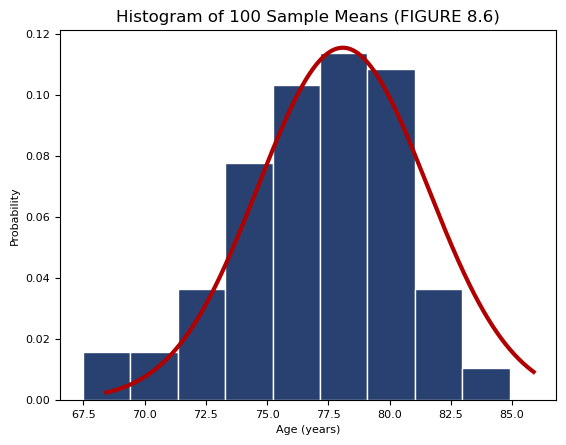

Population mean = 79.22
Sample mean = 78.09 sd = 3.46


In [23]:
# Example 11: Histogram of sample means

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define variables
sample_size = 25
num_dat_sets = 100
sample_means = ([])
num_bins=9
chart_color = '#294171'

# Set the seed
np.random.seed(408)

# Use enumeration to generate sample data sets
data_sets = [np.random.choice(age_popDist_ar, size=sample_size, replace=True) for _ in range(num_dat_sets)]

# Loop through the data and print mean and std
for i, data in enumerate(data_sets):
    result = np.mean(data, axis=0)
    sample_means  = np.concatenate((sample_means, result), axis=None)

# Calculate true population mean
true_mean = np.mean(age_popDist_ar)

# Calculate mean and std for sample means
mu = np.mean(sample_means)
sigma = np.std(sample_means)

x_min = np.min(sample_means)
x_max = np.max(sample_means)

# Generate data for the x-axis
Norm_x = np.linspace(x_min, x_max, 1000)
Norm_y = norm.pdf(Norm_x, mu, sigma)

# Create plotting environment
fig, ax = plt.subplots()

# Set the default font size
plt.rcParams.update({'font.size': 10})  # You can adjust the size as needed

# Plot normal distribution
plt.plot(Norm_x, Norm_y, color='#b00000', linewidth=3)

# Plot histogram
ax.hist(sample_means, bins=num_bins,          
         color=chart_color, 
         edgecolor='white', 
         align='left',
         density=True)

ax.set_xlabel('Age (years)')
ax.set_ylabel('Probability')
ax.set_title("Histogram of 100 Sample Means (FIGURE 8.6)")

# Show plot
plt.show()

# Print results
print(f"Population mean = {true_mean:.2f}")
print(f"Sample mean = {mu:.2f} sd = {sigma:.2f}")

If the code is correct you should see the following output:

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_3_image22.png)


The dark red line is a normal distribution.

_Here's what your textbook says...._

The population of ages at the time of death can also be used to demonstrate an application of the central limit theorem. To do this, we must select repeated samples of size $n$ from the population with mean $µ = 79.2$ years and standard deviation $σ = 16.4 years$ and examine the distribution of the means of these samples. Theoretically, we must enumerate all possible random samples; for now, however, we select 100 samples of size 25. A histogram of the 100 sample means is displayed in **Figure 8.6**. According to the central limit theorem, the distribution of the sample means possesses three  properties. First, its mean should be equal to the population mean µ = 79.2 years. In fact, the mean of the 100 sample means is 79.8 years. Second, we expect the standard error of the sample means to  be σ/√ n = 16.4/ √ 25 = 3.3 years. The calculated standard error is 2.9 years. Finally, the distribution  of sample means should be approximately normal. The shape of Figure 8.6 – and the theoretical  normal distribution superimposed over the histogram – suggest that this third property holds true.  Note that this is a large departure from the population distribution illustrated in Figure 8.2, or from  any of the individual samples shown in Figures 8.3 through 8.5. If n were larger, we would expect  the distribution to look even more normal.  Based on the sampling distribution,

Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 201). CRC Press. Kindle Edition. 

### **Exercise 11: Histograms of 10,000 Sample Means**

According to your textbook and the central limit theorem (CLT), the more samples we take from a distribution, a histogram of their mean values should look more and more like a normal ("bell shape") distribution. In the cell below, set the sample size to 250 instead of 25, and the number of datasets to 10,000. 

You can use the code in Example 11 with the following exceptions:

1. Set `sample_size = 250`
2. Set `num_dat_sets = 10000`
1. Set `num_bins=9`
3. Make sure the random seed = 20
4. Set `ax.set_title("Histogram of 100 Sample Means (FIGURE 8.6)")`

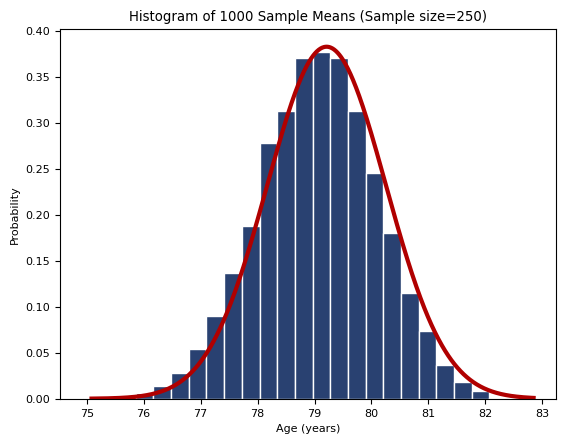

Population mean = 79.22
Sample mean = 79.21 sd = 1.04


In [30]:
# Insert your code for Exercise 11 here

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define variables
sample_size = 250
num_dat_sets = 10000
sample_means = ([])
num_bins=25
chart_color='#294171'

# Set the seed
np.random.seed(20) #  124

# Use enumeration to generate sample data sets
data_sets = [np.random.choice(age_popDist_ar, size=sample_size, replace=True) for _ in range(num_dat_sets)]

# Loop through the data and print mean and std
for i, data in enumerate(data_sets):
    result = np.mean(data, axis=0)
    sample_means  = np.concatenate((sample_means, result), axis=None)

# Calculate mean and std for sample means
mu = np.mean(sample_means)
sigma = np.std(sample_means)

x_min = np.min(sample_means)
x_max = np.max(sample_means)

# Generate data for the x-axis
Norm_x = np.linspace(x_min, x_max, 1000)
Norm_y = norm.pdf(Norm_x, mu, sigma)

# Create plotting environment
fig, ax = plt.subplots()

# Plot normal distribution
plt.plot(Norm_x, Norm_y, color='#b00000', linewidth=3)

# Plot histogram
ax.hist(sample_means, bins=num_bins,          
         color=chart_color, 
         edgecolor='white', 
         align='left',
         density=True)

ax.set_xlabel('Age (years)')
ax.set_ylabel('Probability')
ax.set_title("Histogram of 1000 Sample Means (Sample size=250)")

# Show plot
plt.show()

# Print results
print(f"Population mean = {true_mean:.2f}")
print(f"Sample mean = {mu:.2f} sd = {sigma:.2f}")

If your code is correct you should see the following output:

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_3_image23.png)


### Example 12: Comparison of Population and Sample Mean Distributions

The code in the cell below generates two histograms: (1) a histogram of the population distribution of the age at the time of death and (2) a histogram of the of the average (mean) value of 100 samples in 4 data sets.  

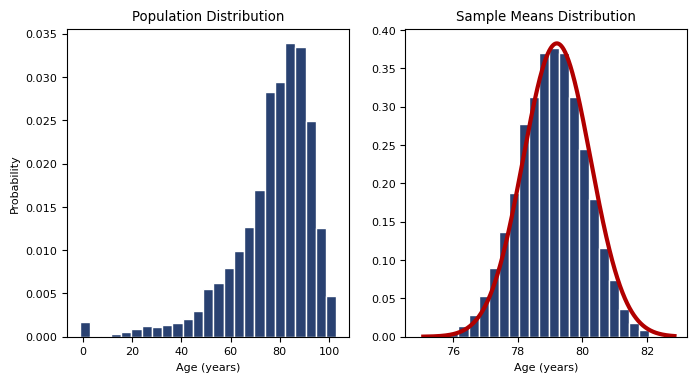

In [29]:
# Example 12: Comparison of population and sample mean distributions

import numpy as np
import matplotlib.pyplot as plt

# Define variables
sample_size = 100
num_dat_sets = 4
chart_color='#294171'
num_bins=25

# Set the seed
np.random.seed(42)

# Sample experimental distribution
data_sets = [np.random.choice(age_popDist_ar, size=sample_size, replace=True) for _ in range(num_dat_sets)]

plt.rcParams['font.size'] = 8

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

plt.rcParams['font.size'] = 8

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot left histogram
axes[0].hist(age_popDist_ar, bins=num_bins,          
         color=chart_color, 
         edgecolor='white', 
         align='left',
         density=True)
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('Probability')
axes[0].set_title("Population Distribution")

# Plot right histogram
axes[1].hist(sample_means, bins=25,          
         color='#294171', 
         edgecolor='white', 
         align='left',
         density=True)

axes[1].set_xlabel('Age (years)')
axes[1].set_title("Sample Means Distribution")

# Loop through the data and print mean and std
for i, data in enumerate(data_sets):
    result = np.mean(data, axis=0)
    sample_means  = np.concatenate((sample_means, result), axis=None)

# Calculate mean and std for sample means
mu = np.mean(sample_means)
sigma = np.std(sample_means)

# Compute range of x
x_min = np.min(sample_means)
x_max = np.max(sample_means)

# Generate data for the x-axis
Norm_x = np.linspace(x_min, x_max, 1000)
Norm_y = norm.pdf(Norm_x, mu, sigma)

# Plot normal distribution
axes[1].plot(Norm_x, Norm_y, color='#b00000', linewidth=3)

# Show plot
plt.show()

If the code is correct you should see the following output:

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_3_image24.png)


## **The Power of the Central Limit Theorem**

The two histograms shown above provide visual evidence of the tremendous power that the **_Central Limit Theorem (CLT)_** gives to a biostatistician, like yourself!

You should recognize the distribution of values in the age at time of death (_left histogram_) is markedly **_right skewed_**. That should make sense to you. While there is a small, but obvious increase in the probability of dying at the time of birth (0 years), the probability of dying remains low through your teens, twenties and thirties, and then starts to increase more rapidly in your fifties and sixties, reaching a peak around 80-85 years. After this peak, the probability of dying decreases simply because there are less and less people who are still alive. The important point is that the population is clearly **_not_** a "bell-shaped" curve.

Now look at the _right histogram_ showing the distribution of **sample means** that were obtained from the population shown in the left histogram. It follows very closely the dark red line which is a plot of a normal distribution. In other words, while a population made not have a normal distribution, if you take many random samples from this population, a make a histogram of the average (mean) value of each random sample, you are **_guaranteed_** that this sample means with be normally distributed. 

The "power" inherent in that last statement will become apparent as we move through this course.

## **Lesson Turn-in**

When you have run all of the code cells. print a PDF of your Colab notebook and upload it to Canvas for grading. 